
<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>**Brain Tumor MRI Classification**</center>




---
## **Table of Contents**
---

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>   
4. [Making Data ready for model](#section4)<br> 
5. [Model Building and Evaluation](#section5)<br>
6. [Conclusion](#section6)<br>
7. [Application](#section7)<br>

<a name=section1></a>

---
# **1. Problem Statement**

---

- A Brain tumor is considered as one of the **aggressive diseases**, among children and adults. Brain tumors account for **85 to 90** percent of all primary Central Nervous System(CNS) tumors. 

- Every year, around **11,700 people** are diagnosed with a brain tumor.

- The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and3 6 percent for women.

- Brain Tumors are classified as:**Benign Tumor, Malignant Tumor, Pituitary Tumor**, etc.

<img src="https://miro.medium.com/max/2800/1*TUF_YfybJPQ8WA0siWeJTg@2x.jpeg" alt="Brain" style="width: 800px;">



### **Scenario**
- Brain Tumors are complex. There are a lot of **abnormalities** in the sizes and **location** of the brain tumor(s). 

- This makes it really difficult for complete understanding of the nature of the tumor.

- Also, a professional **Neurosurgeon** is **required** for MRI **analysis**. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and **time-consuming** to generate reports from MRI’

- Now you being a Data Scientist are given the task to Detect and Classify Brain Tumor using, CNN and Transfer learning

<a name=section2></a>

---
# **2. Importing Libraries**
---

In [ ]:
# Basic import numpy, seaborn, matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.utils import shuffle

# importing opencv and os module
import os
import cv2

# importing basic tensor flow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

# basic train-test split and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# basic widgets libraries
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

<a name=section3></a>

---
# **3. Loading Data**
---

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor'] # defining our labels

- We start off by appending all the images from the  directories into a Python list and then converting them into numpy arrays after resizing it.

In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('/content/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))     # reading image from the path
        img = cv2.resize(img,(image_size, image_size))   # resizing image to 150
        X_train.append(img)                              # adding image to X_train list
        y_train.append(i)                                # adding corresponding label
        
for i in labels:
    folderPath = os.path.join('/content/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))     # reading image from the path
        img = cv2.resize(img,(image_size,image_size))    # resizing image to 150
        X_train.append(img)                              # adding image to X_test list
        y_train.append(i)                                # adding corresponding label
        
X_train = np.array(X_train)                              # coverting image to array
y_train = np.array(y_train)                              # coverting labels to array

100%|██████████| 74/74 [00:00<00:00, 149.88it/s]


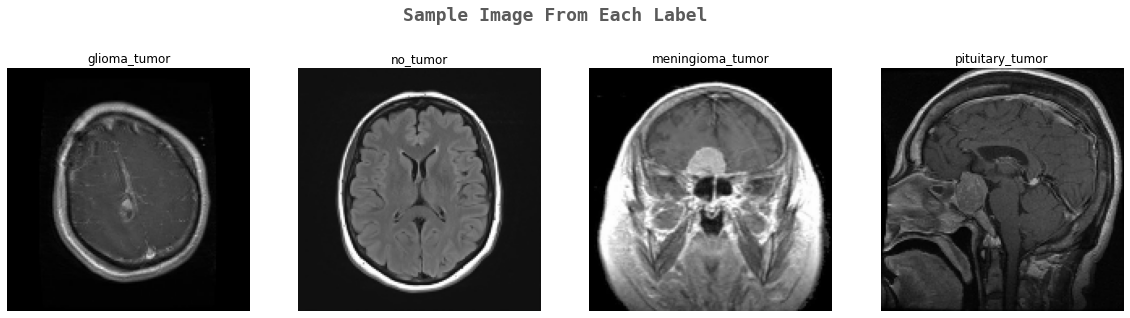

In [ ]:
# showing sample images of each class
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

**Observation:**

- Here we can see each type of **tumor** that we have to **classify**.

---
<a name=section4></a>

## 4. Making data ready for model
---

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101) # shuffing our data

In [ ]:
X_train.shape

(3264, 150, 150, 3)

**Observation:**
- We have **3264 samples** in our data.
- **Size** of each sample is **150x150**.
- Each sample is of **3 channels**.

#### Dividing the dataset into **Training** and **Testing** sets.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

#### Performing **One Hot Encoding** on the labels after converting it into numerical values:

In [ ]:
# one hot encoding on y labels
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

<a name=section5></a>

---
# **5. Model Building and Evaluation**
---


### **Transfer Learning**

- Deep convolutional neural network models may take days or even weeks to train on very large datasets.

- A way to short-cut this process is to **re-use** the model weights from **pre-trained models** that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. 

- Top performing models can be **downloade**d and **used directl**y, or **integrated** into a new model for your own computer vision problems.

- In this notebook, I'll be using the **EfficientNetB0** model which will use the weights from the **ImageNet** dataset.

- The **`include_top`** parameter is set to **False** so that the network doesn't include the **top layer/ output layer** from the **pre-built model** which allows us to add our own output layer depending upon our use case.

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3)) # getting our imagenet weights

16719872/16705208 [==============================] - 0s 0us/step


- **GlobalAveragePooling2D:** This layer acts similar to the **Max Pooling** layer in CNNs, the only difference being is that it uses the Average values instead of the Max value while **pooling**. This really helps in **decreasing** the computational load on the machine while training.

- **Dropout:** This layer **omits** some of the neurons at each step from the layer making the neurons more independent from the **neibouring neurons**. It helps in avoiding **overfitting**. Neurons to be ommitted are selected at random. 

- **rate:** parameter is the **likelihood** of a neuron activation being set to **0**, thus dropping out the neuron

- **Dense:** This is the output layer which classifies the image into **1** of the **4** possible classes. It uses the **softmax** function which is a generalization of the sigmoid function.

In [ ]:
# defining our model
model = effnet.output # 1st layer is output imagenet dataset
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0]']      

#### **We finally compile our model**


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

- **Callbacks:** Callbacks can help you fix bugs more quickly, and can help you build better models. 
  - They can help you visualize how your model’s training is going, and can even help prevent overfitting by implementing early stopping or customizing the learning rate on each iteration.
  - By definition, **"A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training."**

- In this notebook, I'll be using **TensorBoard, ModelCheckpoint and ReduceLROnPlateau** callback functions

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs') # tensorbaord function
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1) # ModelChecpoint function
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,  # ReduceLROnPlateau function
                              mode='auto',verbose=1)

### **Training The Model**

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/12
83/83 [==============================] - ETA: 0s - loss: 0.4694 - accuracy: 0.8263
Epoch 00001: val_accuracy improved from -inf to 0.43878, saving model to effnet.h5
83/83 [==============================] - 50s 346ms/step - loss: 0.4694 - accuracy: 0.8263 - val_loss: 3.9583 - val_accuracy: 0.4388 - lr: 0.0010
Epoch 2/12
83/83 [==============================] - ETA: 0s - loss: 0.2010 - accuracy: 0.9323
Epoch 00002: val_accuracy improved from 0.43878 to 0.67687, saving model to effnet.h5
83/83 [==============================] - 26s 311ms/step - loss: 0.2010 - accuracy: 0.9323 - val_loss: 1.1619 - val_accuracy: 0.6769 - lr: 0.0010
Epoch 3/12
83/83 [==============================] - ETA: 0s - loss: 0.1354 - accuracy: 0.9523
Epoch 00003: val_accuracy improved from 0.67687 to 0.88435, saving model to effnet.h5
83/83 [==============================] - 25s 304ms/step - loss: 0.1354 - accuracy: 0.9523 - val_loss: 0.3908 - val_accuracy: 0.8844 - lr: 0.0010
Epoch 4/12
83/83 [==========

**Observation**
- The train accuracy is **99%** with loss = **0.0103**
- The validation accuracy is **98%** with loss = **0.0348**

### **Plotting accuracy and loss of training and validation data**

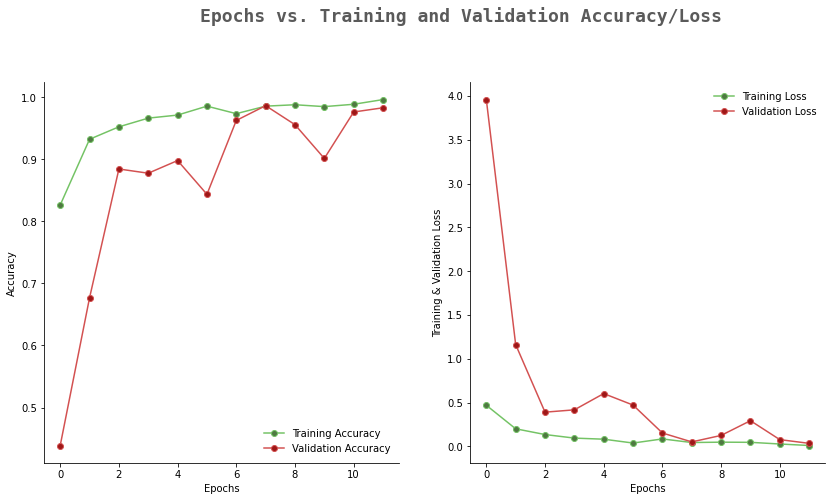

In [ ]:

# Visualize epochs vs. train and validation accuracies and losses
epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

**Observation**
- Here we observed that in accuracy plot both train and validation data follow **increasing nature** with inc of no of epochs

- In loss plot we saw both train and val data is **decreasing** with epochs and we also **converging** of the losses which is a good thing

#### **Prediction of our test data**

- We've used the **argmax function** as each row from the prediction array contains four values for the respective labels. 

- The **maximum** value which is in each row depicts the predicted output out of the **4** possible outcomes.

- So with **argmax**, we are able to find out the index associated with the predicted outcome.

In [ ]:
# predicting our label
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

### **Evaluation of our model**

Here we have: <br>
0 - **Glioma Tumor**<br>
1 - **No Tumor**<br>
2 - **Meningioma Tumor**<br>
3 - **Pituitary Tumor**<br>

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        93
           1       1.00      1.00      1.00        51
           2       0.97      0.96      0.96        96
           3       0.98      1.00      0.99        87

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



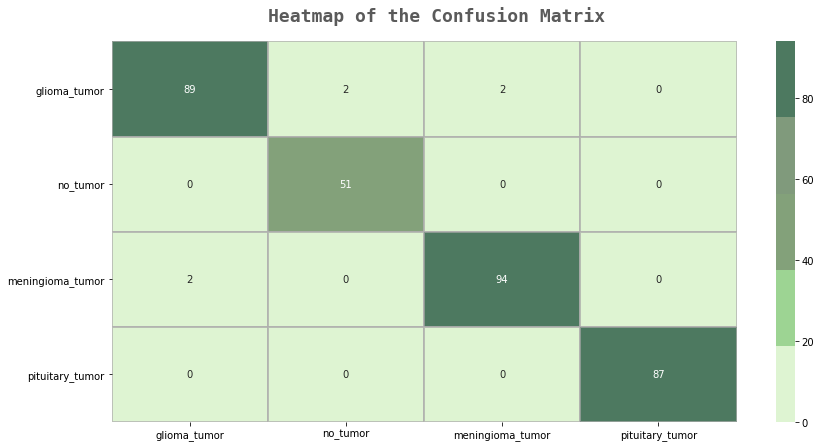

In [ ]:
#ploting confusion matrix
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

**Observation**
- All the **diagonals cells** in our confusion matrix are **high** in number which is the output that want.
- Since this is medical application it is very **important** to classify each **tumor** as **correctly** as possible

### Making widgets to predict tumor by uploading image

- These Widgets in which we can upload images from our local machine and predict whether the MRI scan has a Brain Tumour or not and to classify which Tumor it is.<br>


In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

- Below is where you can upload the image by clicking on the **Upload** button:

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

- After uploading the image, you can click on the **Predict** button below to make predictions:

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])

<a name=section6></a>

---
# **6. Conclusion**
---


- Brain tumor Image Classification with the help of CNN using Transfer Learning which gave an accuracy of **around 98%**.<br>
- We made widgets which can make predictions on an image from your **local machine!**
- Also we realised if we have small image datset for deep learning we could use **Transfer learning** to get the best results.
- Using **callbacks** function in deep network becomes very useful.

<a name=section7></a>

---
# **7. Applications**
---

- This CNN and transfer learning could be very useful in **medical** for tumor detections
- Similarly we this we would be helpful for **Chest X-ray** for detecting various infections
- The concept of **transfer learning** has its use in **text classification**, sentiment classification etc.
